In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

there is 12 months of data, we have to merge them into a single file 

In [20]:
import os
import glob
files = os.path.join("sales/","sales*.csv")
files = glob.glob(files)
df = pd.concat(map(pd.read_csv,files),ignore_index = True)
# print(df.head())
# print(df.shape)
df.to_csv("all_data.csv",index = False) #created a csv with all sales data 


  Order ID                     Product Quantity Ordered Price Each  \
0   278797            Wired Headphones                1      11.99   
1   278798        USB-C Charging Cable                2      11.95   
2   278799    Apple Airpods Headphones                1      150.0   
3   278800            27in FHD Monitor                1     149.99   
4   278801  Bose SoundSport Headphones                1      99.99   

       Order Date                      Purchase Address  
0  11/21/19 09:54   46 Park St, New York City, NY 10001  
1  11/17/19 10:03      962 Hickory St, Austin, TX 73301  
2  11/19/19 14:56  464 Cherry St, Los Angeles, CA 90001  
3  11/25/19 22:24        649 10th St, Seattle, WA 98101  
4  11/09/19 13:56         522 Hill St, Boston, MA 02215  
(186850, 6)


In [23]:
df = pd.read_csv("all_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


best month for sales and how much money was made in that month?

In [39]:
#adding a column for month
df["Month"] = df["Order Date"].str[0:2]
#df["Month"] = df["Month"].astype('int32') #converting to int   
#before we convert we have to get rid of NaN
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [43]:
#getting rid of NaN
df.dropna(how = 'any',inplace = True)
df["Month"] = df["Month"].astype('float') #converting to int  

ValueError: could not convert string to float: 'Or'

In [ ]:
#in the month column there is 'Or' somewhere 

In [53]:
temp_df = df[df['Order Date'].str[0:2] == 'Or']
temp_df.head()
#getting rid of or by setting the original df to column not having Or
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [57]:
#trying to convert again
df["Month"] = df["Month"].astype('float') #converting to int  
df["Month"] = df["Month"].astype('int') #converting to int  
print(type(df['Month'][0]))
#successfully converted month values to int 

<class 'numpy.int64'>


# adding per order sales column 

In [65]:
print(type(df['Quantity Ordered'][0]),type(df['Price Each'][0]))
#df['Sales'] = df['Quantity Ordered']*df['Price Each']
#both columns are of type string so we cannot directly multiply 
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('float')
print(type(df['Quantity Ordered'][0]),type(df['Price Each'][0]))
#conversion successful
#we can also use pd.to_numeric(df[colname])

<class 'numpy.float64'> <class 'numpy.float64'>
<class 'numpy.float64'> <class 'numpy.float64'>


In [67]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


# Best month for sales 

In [80]:
#using group by
result = df.groupby("Month").sum()#.astype('str') #values are being printed as str to avoid e but are actually float
print(result)
#print(type(df['Sales'][0]))
#values in exponents 


       Quantity Ordered    Price Each         Sales
Month                                              
1               10903.0  1.811768e+06  1.822257e+06
2               13449.0  2.188885e+06  2.202022e+06
3               17005.0  2.791208e+06  2.807100e+06
4               20558.0  3.367671e+06  3.390670e+06
5               18667.0  3.135125e+06  3.152607e+06
6               15253.0  2.562026e+06  2.577802e+06
7               16072.0  2.632540e+06  2.647776e+06
8               13448.0  2.230345e+06  2.244468e+06
9               13109.0  2.084992e+06  2.097560e+06
10              22703.0  3.715555e+06  3.736727e+06
11              19798.0  3.180601e+06  3.199603e+06
12              28114.0  4.588415e+06  4.613443e+06


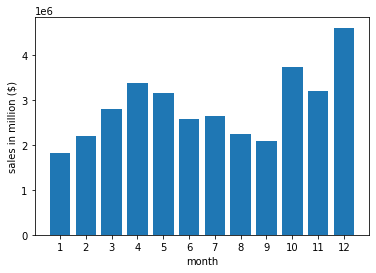

In [85]:
#plotting 
months = range(1,13)
plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel("sales in million ($)")
plt.xlabel("month")
plt.show()
#as a data analyst i would answer why the 12th month did better than others
#did we spend more money on marketing, would look for correlations
#since the sales are in usd (for USA) it can be because of the holiday season 


# which city had the highest sales 

In [138]:
df.head()
#we will need a city column 
#city is in the address column and between 2 commas 
#using.apply() - can apply any user def function on the dataframe
def getcity(address):
    #split on the commas 
    lst = address.split(",")
    return(lst[1]+" "+lst[2][1:3])
def getstate(address):
    #split on the commas 
    lst = address.split(",")
    return(lst[2][1:3])

df['city'] = df["Purchase Address"].apply(getcity)
#we might have an issue where the city name is same but state is different
df['State'] = df["Purchase Address"].apply(getstate)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,State
0,278797,Wired Headphones,1.0,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City NY,NY
1,278798,USB-C Charging Cable,2.0,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX,TX
2,278799,Apple Airpods Headphones,1.0,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA,CA
3,278800,27in FHD Monitor,1.0,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA,WA
4,278801,Bose SoundSport Headphones,1.0,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA,MA


In [129]:
results = df.groupby("city").sum()
results

,Quantity Ordered,Price Each,Month,Sales
city,,,,
"( Atlanta, GA)",16602.0,2.779908e+06,104794,2.795499e+06
"( Austin, TX)",11153.0,1.809874e+06,69829,1.819582e+06
"( Boston, MA)",22528.0,3.637410e+06,141112,3.661642e+06
"( Dallas, TX)",16730.0,2.752628e+06,104620,2.767975e+06
"( Los Angeles, CA)",33289.0,5.421435e+06,208325,5.452571e+06
"( New York City, NY)",27932.0,4.635371e+06,175741,4.664317e+06
"( Portland, ME)",2750.0,4.471893e+05,17144,4.497583e+05
"( Portland, OR)",11303.0,1.860558e+06,70621,1.870732e+06
"( San Francisco, CA)",50239.0,8.211462e+06,315520,8.262204e+06


[' Atlanta GA', ' Austin TX', ' Boston MA', ' Dallas TX', ' Los Angeles CA', ' New York City NY', ' Portland ME', ' Portland OR', ' San Francisco CA', ' Seattle WA']


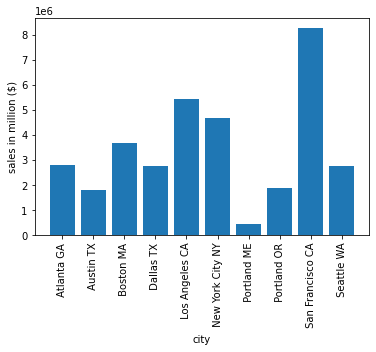

In [143]:
cities = [city for city,df in df.groupby('city')]
print(cities)
plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation = 'vertical')
plt.ylabel("sales in million ($)")
plt.xlabel("city")
plt.show()